In [5]:
!pip install scikit-fuzzy
!pip install networkx

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.1 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 8.2 MB/s  0:00:00


In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 25, 40])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 40, 40])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

In [7]:
rule1 = ctrl.Rule(temperature['cold'] & humidity['low'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['medium'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['high'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['warm'] & humidity['low'], fan_speed['low'])
rule5 = ctrl.Rule(temperature['warm'] & humidity['medium'], fan_speed['medium'])
rule6 = ctrl.Rule(temperature['warm'] & humidity['high'], fan_speed['high'])
rule7 = ctrl.Rule(temperature['hot'] & humidity['low'], fan_speed['medium'])
rule8 = ctrl.Rule(temperature['hot'] & humidity['medium'], fan_speed['high'])
rule9 = ctrl.Rule(temperature['hot'] & humidity['high'], fan_speed['high'])

Fan Speed: 60.16199376947047


c:\Users\DESKTOP\miniconda3\envs\ml_env\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


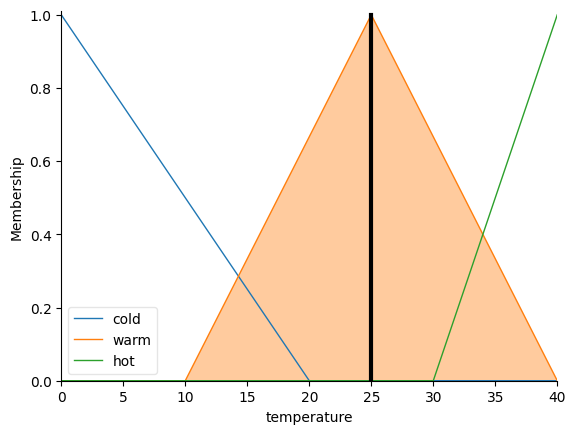

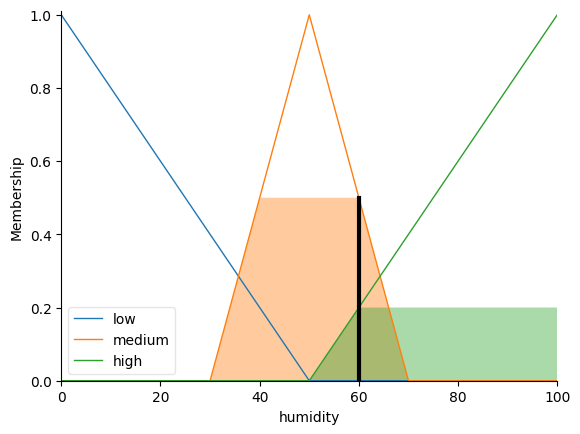

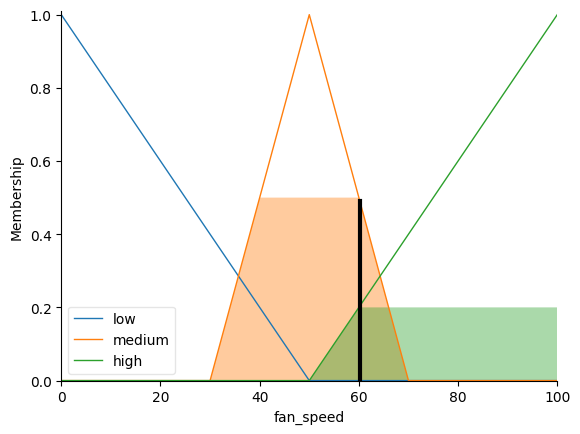

In [8]:
fan_speed_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fan_speed_simulation = ctrl.ControlSystemSimulation(fan_speed_control)

fan_speed_simulation.input['temperature'] = 25
fan_speed_simulation.input['humidity'] = 60

fan_speed_simulation.compute()

print(f"Fan Speed: {fan_speed_simulation.output['fan_speed']}")

temperature.view(sim=fan_speed_simulation)
humidity.view(sim=fan_speed_simulation)
fan_speed.view(sim=fan_speed_simulation)